## **Preparación del entorno de trabajo**

In [ ]:
!pip install BaselineRemoval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!rm -rf marvik-final/

## **Librerías necesarias**

In [ ]:
# Imports necesarios
%matplotlib inline  
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from BaselineRemoval import BaselineRemoval
import matplotlib
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# Para graficar la matriz de confusión con la librería Seaborn
import seaborn as sns

# Fijo una semilla para el generador de números pseudo aleatorios.
np.random.seed(2)
# 
np.set_printoptions(precision=3)

## **Cargamos los archivos al directorio local**
Esto se realiza clonando el repositorio de github correspondiente al proyecto:

In [ ]:
# Clonamos el repositorio que contiene el archivo a ser usado:

! git clone https://github.com/tabareperez/marvik-final

# Quedan disponibles los archivos clasificacion.csv y clasificación-02.csv para el desarrollo del modelo
# 

Cloning into 'marvik-final'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 22 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


## **Importamos los datos al dataframe**

In [ ]:
data = pd.read_csv('./marvik-final/clasificacion-02.csv')

Previsualizamos los primeros datos de la tabla:

1. Sample ID
2. Espectro NIR (141 varables, una para cada longitud de onda).
3. La variable categórica VIRGINIA que permite diferenciar a los tabacos de este tipo de los que no lo son.


In [ ]:
# Revisamos los primeros registros
data.head()

,Sample ID,950,955,960,965,970,975,980,985,990,...,1610,1615,1620,1625,1630,1635,1640,1645,1650,VIRGINIA
0,64088,0.105716,0.104010,0.102346,0.100992,0.099617,0.098099,0.096670,0.095329,0.094010,...,0.136425,0.134854,0.133507,0.132254,0.131111,0.130021,0.129165,0.128488,0.128150,0
1,64086,0.112723,0.111009,0.109287,0.107848,0.106398,0.104866,0.103347,0.101925,0.100564,...,0.135466,0.134069,0.132944,0.131896,0.130915,0.129971,0.129229,0.128640,0.128480,0
2,64090,0.112174,0.110596,0.109150,0.108013,0.106910,0.105714,0.104604,0.103549,0.102380,...,0.177416,0.175487,0.173821,0.172292,0.170933,0.169598,0.168477,0.167584,0.167237,0
3,64216,0.111028,0.109027,0.107251,0.105746,0.104319,0.102828,0.101479,0.100087,0.098642,...,0.187482,0.185492,0.183788,0.182113,0.180424,0.178914,0.177847,0.176988,0.176509,0
4,64217,0.115590,0.113680,0.111846,0.110308,0.108918,0.107422,0.106000,0.104632,0.103219,...,0.183697,0.181724,0.180059,0.178369,0.176722,0.175312,0.174273,0.173410,0.172944,0


## **Preparación del set de datos de entrenamiento**
Asignamos nuestras variables de entrenamiento:

*   x con los espectros.
*   y con la etiqueta real asignada a cada muestra:

    *   0 - Tabaco tipo VIRGINIA
    *   1 - Tabaco diferente al tipo VIRGINIA





In [ ]:
# Cargamos en x los espectros NIR de las muestras y en y solamente la variable VIRGINIA que distingue a los tabacos de ese tipo de los que no los son.
x = data.iloc[:, data.columns != 'VIRGINIA']
x = x.iloc[:,x.columns !='Sample ID']
y = data.iloc[:, data.columns == 'VIRGINIA']
x.shape

(1139, 141)

## **Separamos nuestros datos en un juego para training y en otro para test**
Tomamos un 30% de los datos para test.

In [ ]:
# Usamos las funcionalidades de scikit-learn para hacer el split de los sets de datos de entrenamiento.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
# Veamos la forma de nuestros datos de entrenamiento
print(x_train.shape)

# Transformo en np.array para usar más adelante
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

(797, 141)


## **Generación del modelo**

In [ ]:
# Modelo
model_raw = Sequential()
model_raw.add(Dense(units=16, kernel_initializer='uniform', input_dim=141, activation='relu'))
model_raw.add(Dense(units=18, kernel_initializer='uniform', activation='relu'))
model_raw.add(Dropout(0.25))
model_raw.add(Dense(20, kernel_initializer='uniform', activation='relu'))
model_raw.add(Dense(24, kernel_initializer='uniform', activation='relu'))
model_raw.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [ ]:
# Veamos la arquitectura resultante
model_raw.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                2272      
                                                                 
 dense_1 (Dense)             (None, 18)                306       
                                                                 
 dropout (Dropout)           (None, 18)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                380       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 3,487
Trainable params: 3,487
Non-trainabl

In [ ]:
# Entrenamiento
model_raw.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_raw.fit(x_train, y_train, batch_size=15, epochs=50)

Epoch 1/50
54/54 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.5734
Epoch 2/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5734
Epoch 3/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.5734
Epoch 4/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.5734
Epoch 5/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5734
Epoch 6/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5734
Epoch 7/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5734
Epoch 8/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5734
Epoch 9/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.5734
Epoch 10/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.5734
Epoch 11/50
54/54 [

## **Evaluación de resultados**
Evaluemos el modelo usando la función [evaluate de Keras](https://keras.io/models/model/#evaluate).

In [ ]:
# Evaluación del modelo
score = model_raw.evaluate(x_test, y_test, batch_size=15)
print('Resultado: ', score[1] * 100, '%')

23/23 [==============================] - 0s 1ms/step - loss: 0.3027 - accuracy: 0.8713
Resultado:  87.1345043182373 %


## **Predicción sobre el set de test**



In [ ]:
# Predecimos sobre el set de test
y_pred = model_raw.predict(x_test)
# Transformo y_test en un data frame de panda
y_test = pd.DataFrame(y_test)

## **Matriz de confusión**

Recall:  0.8343558282208589
[[162  17]
 [ 27 136]]


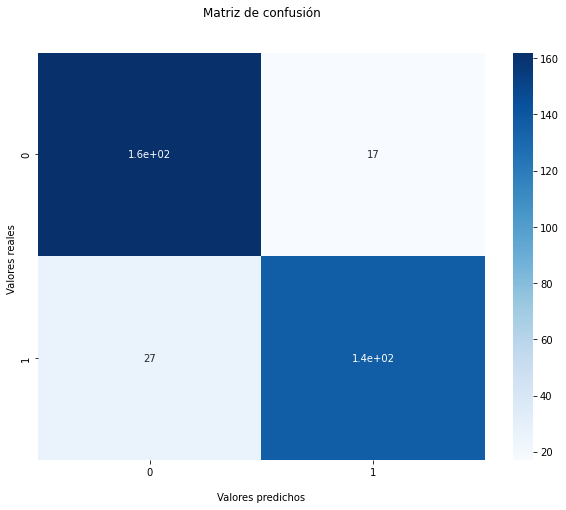

In [ ]:
# Calculo la matriz de confusión
cnf_matrix = confusion_matrix(y_test,y_pred.round())

print("Recall: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print(cnf_matrix)

# Grafico la matriz de confusión
plt.rcParams["figure.figsize"] = (10, 7.5)
ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusión\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
# Despliego el gráfico
plt.show()

## **Predecimos para todo el dataset**

In [ ]:
# Aplico el modelo sobre todo el data set
y_pred = model_raw.predict(np.array(x))

# Calculo la matriz de confusión
cnf_matrix = confusion_matrix(y,y_pred.round())
print("Recall: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print(cnf_matrix)

Recall:  0.8409542743538767
[[568  68]
 [ 80 423]]


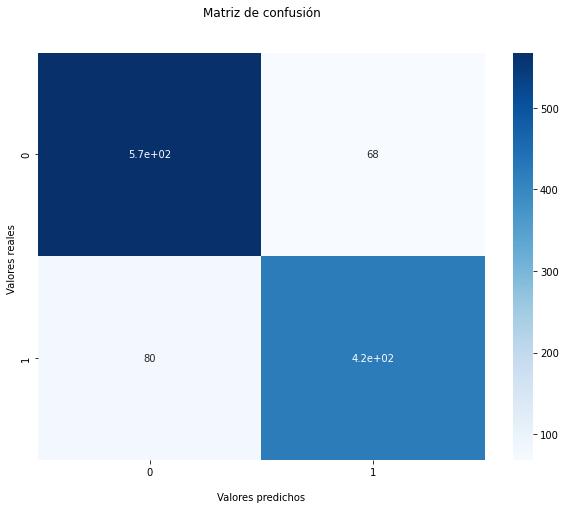

In [ ]:
# Grafico la matriz de confusión
plt.rcParams["figure.figsize"] = (10, 7.5)
ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusión\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
# Despliego el gráfico
plt.show()

## **Corrijo línea de base de los espectros**

In [ ]:
# Armo la matriz de espectros
spec=data.drop(columns=['Sample ID', 'VIRGINIA'],axis=1)

# Corrijo línea de base
polynomial_degree=2 #only needed for Modpoly and IModPoly algorithm
specObj=BaselineRemoval(spec)

# Para recorrer todos los espectros: len(data)
data_corregido = pd.DataFrame(columns=data.columns[1:142])
for i in range(len(data)):
  spec=data.iloc[i,1:142]
  specObj=BaselineRemoval(spec)
  spec_corregido = specObj.ModPoly(polynomial_degree)
  data_corregido.loc[i] = spec_corregido

## **Gráficos de datos crudos y con corrección de la línea de base**

In [ ]:
# Asigno nuevo x. El y es el mismo
x = data_corregido
x.shape

(1139, 141)

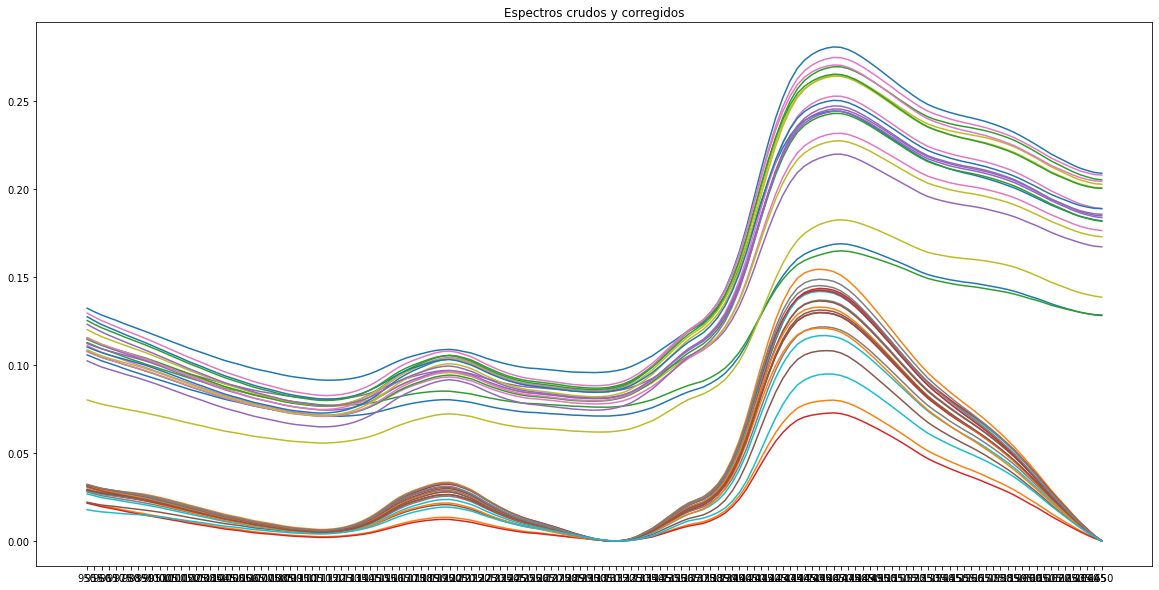

In [ ]:
# Ploteo los primeros 20 espectros sin y con corrección de línea de base.
plt.rcParams["figure.figsize"] = (20, 10)
for i in range(20):
  spec = data.iloc[i,1:142]
  spec_corregido = x.iloc[i,0:141]
  plt.plot(spec)
  plt.title('Espectros crudos y corregidos')
  plt.plot(spec_corregido)

plt.show()


## **Separamos nuestros datos en un juego para training y en otro para test**
Tomamos un 30% de los datos para test.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
# Veamos la forma de nuestros datos de entrenamiento
print(x_train.shape)

# Transformo en np.array para usar más adelante
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

(797, 141)


## **Red neuronal**

In [ ]:
# Modelo
model_lb = Sequential()
model_lb.add(Dense(units=16, kernel_initializer='uniform', input_dim=141, activation='relu'))
model_lb.add(Dense(units=18, kernel_initializer='uniform', activation='relu'))
model_lb.add(Dropout(0.25))
model_lb.add(Dense(20, kernel_initializer='uniform', activation='relu'))
model_lb.add(Dense(24, kernel_initializer='uniform', activation='relu'))
model_lb.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [ ]:
# Estructura del modelo
model_lb.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                2272      
                                                                 
 dense_11 (Dense)            (None, 18)                306       
                                                                 
 dropout_2 (Dropout)         (None, 18)                0         
                                                                 
 dense_12 (Dense)            (None, 20)                380       
                                                                 
 dense_13 (Dense)            (None, 24)                504       
                                                                 
 dense_14 (Dense)            (None, 1)                 25        
                                                                 
Total params: 3,487
Trainable params: 3,487
Non-traina

In [ ]:
# Entrenamiento
model_lb.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lb.fit(x_train, y_train, batch_size=15, epochs=50)

Epoch 1/50
54/54 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5345
Epoch 2/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5734
Epoch 3/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5734
Epoch 4/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5734
Epoch 5/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.5734
Epoch 6/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5734
Epoch 7/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.5734
Epoch 8/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6820 - accuracy: 0.5734
Epoch 9/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6810 - accuracy: 0.5734
Epoch 10/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.5734
Epoch 11/50
54/54 [

## **Evaluación de resultados**
Evaluemos el modelo usando la función [evaluate de Keras](https://keras.io/models/model/#evaluate).

In [ ]:
# Evaluación del modelo
score = model_lb.evaluate(x_test, y_test, batch_size=15)
print('Resultado: ', score[1] * 100, '%')

23/23 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9357
Resultado:  93.56725215911865 %


In [ ]:
# Predecimos sobre el set de test
y_pred = model_lb.predict(x_test)

In [ ]:
# Transformo y_test en un data frame de panda
y_test = pd.DataFrame(y_test)

Recall:  0.950920245398773
[[165  14]
 [  8 155]]


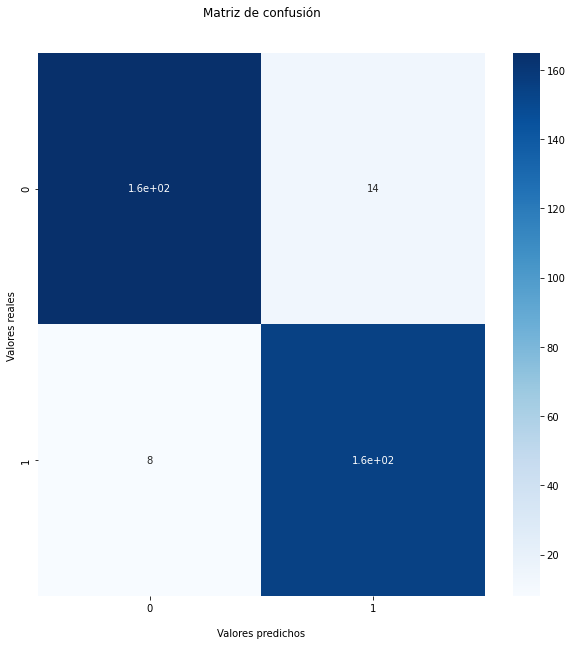

In [ ]:
# Calculo la matriz de confusión
cnf_matrix = confusion_matrix(y_test,y_pred.round())
np.set_printoptions(precision=3)

print("Recall: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print(cnf_matrix)

# Grafico la matriz de confusión
plt.rcParams["figure.figsize"] = (10, 10)
ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues')

ax.set_title('Matriz de confusión\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
# Despliego el gráfico
plt.show()

In [ ]:
# Aplico el modelo sobre todo el data set
y_pred = model_lb.predict(np.array(x))
cnf_matrix = confusion_matrix(y,y_pred.round())
print("Recall: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print(cnf_matrix)

Recall:  0.9443339960238568
[[603  33]
 [ 28 475]]


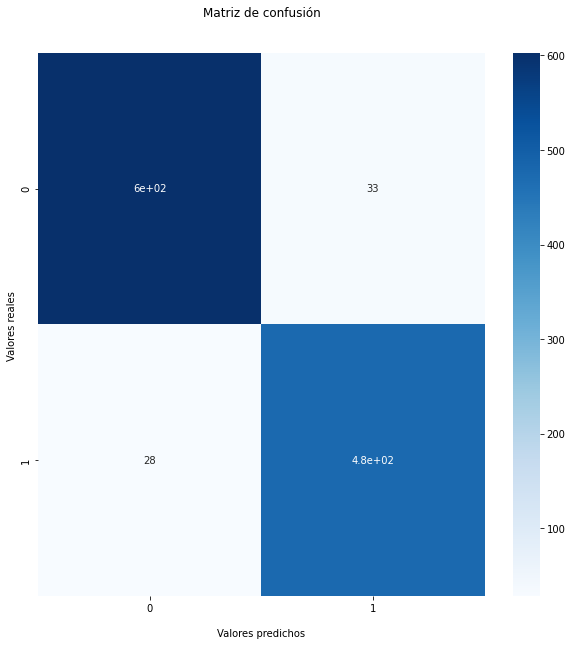

In [ ]:
# Grafico la matriz de confusión
plt.rcParams["figure.figsize"] = (10, 10)
ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusión\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
# Despliego el gráfico
plt.show()